# **Proyek Capstone: Analisis Isu Lingkungan Global melalui Berita**
### **Klasifikasi dan Peringkasan Otomatis dengan IBM Granite AI**

---

**Nama Peserta:** Hendy Suka Muliawan  
**Program Sertifikasi:** IBM Data Classification and Summarization Using IBM Granite  
**Tanggal Penyelesaian:** [Isi Tanggal Anda Menyelesaikan Proyek Ini, misal: 20 Juli 2025]

---

**Sumber Daya Penting:**
* [Link ke Dataset Kaggle 'Guardian Environment News'](https://www.kaggle.com/datasets/khalils/guardian-environment-news)
* [Link ke Repositori GitHub Proyek Ini (Setelah Anda Mengunggahnya)]()
* [Link ke LinkedIn Saya](https://www.linkedin.com/in/hendy-suka-muliawan)

---

## **1. Pendahuluan**

Di dunia yang terus bergerak cepat ini, kita dibanjiri oleh informasi, terutama dalam bentuk teks. Bagi sektor-sektor krusial seperti Lingkungan, Sosial, dan Tata Kelola (ESG) atau Kesehatan, Keselamatan, dan Lingkungan (HSE) di perusahaan besar, memahami isu-isu terbaru seputar lingkungan adalah hal yang sangat vital. Namun, membaca ribuan artikel berita, laporan, atau dokumen secara manual adalah pekerjaan yang mustahil.

### **Latar Belakang & Tantangan**
Tantangan utama kita adalah bagaimana menemukan "permata" informasi dari tumpukan data teks yang sangat besar. Bagaimana kita bisa dengan cepat mengidentifikasi topik-topik lingkungan penting dan mendapatkan intisari dari setiap artikel tanpa harus membaca semuanya? Kita butuh solusi otomatis untuk ini.

### **Tujuan Proyek**
Proyek Capstone ini hadir untuk menjawab tantangan tersebut. Tujuannya adalah membangun sebuah sistem pintar yang bisa:
1.  **Mengklasifikasikan** artikel berita lingkungan ke dalam kategori isu spesifik (misalnya, Perubahan Iklim, Polusi, Energi Terbarukan).
2.  **Meringkas** artikel yang panjang menjadi beberapa kalimat inti yang mudah dipahami.

Untuk mewujudkannya, kami akan memanfaatkan kecerdasan buatan dari model Bahasa Besar (LLM) **IBM Granite**, yang bisa diakses dengan mudah melalui platform **Replicate**.

## **2. Persiapan Lingkungan & Konfigurasi Model IBM Granite**

Sebelum kita menyelami data, kita perlu menyiapkan "meja kerja" kita di Google Colab. Ini termasuk memasang pustaka (libraries) yang dibutuhkan dan mengatur model AI IBM Granite.

### **Instalasi Pustaka (Libraries)**
Pustaka-pustaka ini sangat penting untuk proyek kita:
* `langchain_community` & `replicate`: Keduanya seperti "jembatan" yang menghubungkan kode kita ke model IBM Granite di Replicate.
* `pandas`: Ini adalah alat kita untuk mengelola dan melihat data dalam bentuk tabel, sangat berguna untuk file CSV.
* `matplotlib` & `seaborn`: Ini adalah kuas dan kanvas kita untuk membuat visualisasi data yang menarik!

In [ ]:
!pip install langchain_community
!pip install replicate
!pip install pandas
!pip install matplotlib seaborn

### **Konfigurasi API Model IBM Granite**
Model utama kita, IBM Granite 3.3-8B-Instruct, diakses melalui Replicate API. Untuk memastikan keamanan, kunci API kita disimpan di **Google Colab Secrets**—ini seperti brankas digital untuk informasi rahasia. Kami juga mengatur beberapa parameter khusus untuk model, seperti `max_tokens` yang besar agar model bisa memproses artikel panjang dengan baik, dan `temperature` yang seimbang untuk respons yang relevan dan tidak terlalu "liar."

In [63]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

api_token = userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN'] = api_token

print("Replicate API token telah diatur.")

parameters = {
    "top_k": 5,
    "top_p": 1.0,
    "max_tokens": 4098,
    "min_tokens": 1,
    'random_seed': None,
    "temperature": 0.7,
    "repetition_penalty": 1.0,
}

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters,
)

print("\nModel IBM Granite berhasil diinisialisasi.")

Replicate API token telah diatur.

Model IBM Granite berhasil diinisialisasi.


## **3. Akuisisi dan Pra-pemrosesan Data**

Data yang kita gunakan berasal dari **"Guardian Environment News Dataset"** di Kaggle. Ini adalah kumpulan lebih dari 30.000 artikel berita lingkungan dari surat kabar The Guardian, terbit antara 2017 hingga 2024.

### **Proses Pemuatan Data**
Dataset ini awalnya dikemas dalam file ZIP (`archive.zip`) yang berisi file CSV (`guardian_environment_news.csv`). Untuk proyek ini, dan agar prosesnya cepat serta tidak membebani API, kita hanya akan mengekstrak file dan memproses **10 artikel berita teratas** saja. Ini sudah cukup untuk mendemonstrasikan kemampuan model.

In [66]:
import zipfile
import pandas as pd

zip_file_name = 'archive.zip'
csv_file_name = 'guardian_environment_news.csv'

try:
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f"'{zip_file_name}' berhasil diekstrak.")
except FileNotFoundError:
    print(f"Error: File '{zip_file_name}' tidak ditemukan. Pastikan Anda sudah mengunggahnya ke Colab.")
except Exception as e:
    print(f"Terjadi kesalahan saat mengekstrak file: {e}")

try:
    df = pd.read_csv(csv_file_name)

    print(f"Dataset '{csv_file_name}' berhasil dimuat. Total artikel: {len(df)}")

    articles = df.head(10).copy()
    print(f"Mengambil {len(articles)} artikel teratas untuk diproses.")

    print("\nContoh 10 artikel teratas:")
    print(articles[['Title', 'Article Text']].head(10).to_markdown(index=False))

except FileNotFoundError:
    print(f"Error: File '{csv_file_name}' tidak ditemukan setelah ekstraksi.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat atau memproses CSV: {e}")

'archive.zip' berhasil diekstrak.
Dataset 'guardian_environment_news.csv' berhasil dimuat. Total artikel: 30059
Mengambil 10 artikel teratas untuk diproses.

Contoh 10 artikel teratas:
| Title                                                                  | Article Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## **4. Implementasi Model AI: Klasifikasi & Peringkasan**

Sekarang, mari kita lihat bagaimana model IBM Granite bekerja. Kami akan menginstruksikan model untuk melakukan dua tugas utama pada setiap artikel: **klasifikasi** (mengidentifikasi topiknya) dan **peringkasan** (membuat intisari singkat).

### **Contoh Peringkasan Artikel**
Kita akan mengambil artikel pertama dari 10 artikel teratas yang sudah kita siapkan dan meminta model untuk meringkasnya menjadi 3-4 kalimat. Ini sangat membantu untuk mendapatkan gambaran cepat tentang isi artikel tanpa perlu membaca semuanya.

In [67]:
# Contoh peringkasan untuk artikel pertama dari 10 artikel teratas
if 'articles' in locals() and not articles.empty:
    first_article_title = articles.iloc[0]['Title']
    first_article_text = articles.iloc[0]['Article Text']

    summarization_prompt = f"""Ringkaslah artikel berita berikut dalam 3-4 kalimat. Fokus pada isu lingkungan utama dan dampaknya.

    Judul Artikel: {first_article_title}

    Isi Artikel:
    {first_article_text}

    Ringkasan:
    """

    print("\n--- Contoh Prompt untuk Peringkasan ---")
    print(summarization_prompt)

    print("\n--- Hasil Peringkasan (Contoh 1 Artikel) ---")
    try:
        output_summary = llm.invoke(summarization_prompt)
        print(output_summary)
    except Exception as e:
        print(f"Terjadi kesalahan saat memanggil LLM untuk peringkasan: {e}")

else:
    print("Dataset artikel belum dimuat atau kosong. Pastikan langkah sebelumnya berjalan dengan baik.")


--- Contoh Prompt untuk Peringkasan ---
Ringkaslah artikel berita berikut dalam 3-4 kalimat. Fokus pada isu lingkungan utama dan dampaknya.

    Judul Artikel:  Liz Truss ‘will approve more oil drilling if she becomes PM’

    Isi Artikel:
    Liz Truss will sign off on a push for more oil drilling in the North Sea if she wins the Conservative leadership election, according to reports, drawing criticism from environmental campaigners.Amid mounting public dismay about soaring energy bills, Truss’s policy advisers are thought to be discussing proposals to issue up to 130 new drilling licences, which typically take nearly three decades to produce any oil and gas.The business secretary, Kwasi Kwarteng, and the Brexit opportunities minister, Jacob Rees-Mogg, have been meeting oil and gas firms to discuss how to secure energy supplies this winter, the Times reported.Truss’s plans to slash VAT are ‘regressive and flawed’, says Sunak’s teamRead moreThe discussions reportedly involve importing

### **Contoh Klasifikasi Artikel**
Selain meringkas, model juga dapat mengklasifikasikan artikel ke dalam kategori isu lingkungan yang sudah kita tentukan. Ini sangat berguna untuk mengorganisir informasi dan menemukan artikel berdasarkan topik yang diminati. Kita akan lihat bagaimana model mengklasifikasikan artikel pertama.

In [68]:
# Contoh klasifikasi untuk artikel pertama dari 10 artikel teratas
if 'articles' in locals() and not articles.empty:
    first_article_title = articles.iloc[0]['Title']
    first_article_text = articles.iloc[0]['Article Text']

    classification_prompt = f"""Baca artikel berita berikut dan klasifikasikan ke dalam salah satu kategori berikut: 'Perubahan Iklim', 'Polusi Air', 'Polusi Udara', 'Deforestasi', 'Konservasi Keanekaragaman Hayati', 'Energi Terbarukan', 'Manajemen Limbah', 'Bencana Alam', 'Lain-lain'. Berikan hanya nama kategori.

    Judul Artikel: {first_article_title}

    Isi Artikel:
    {first_article_text}

    Kategori:
    """

    print("\n--- Contoh Prompt untuk Klasifikasi ---")
    print(classification_prompt)

    print("\n--- Hasil Klasifikasi (Contoh 1 Artikel) ---")
    try:
        output_classification = llm.invoke(classification_prompt)
        print(output_classification)
    except Exception as e:
        print(f"Terjadi kesalahan saat memanggil LLM untuk klasifikasi: {e}")


--- Contoh Prompt untuk Klasifikasi ---
Baca artikel berita berikut dan klasifikasikan ke dalam salah satu kategori berikut: 'Perubahan Iklim', 'Polusi Air', 'Polusi Udara', 'Deforestasi', 'Konservasi Keanekaragaman Hayati', 'Energi Terbarukan', 'Manajemen Limbah', 'Bencana Alam', 'Lain-lain'. Berikan hanya nama kategori.

    Judul Artikel:  Liz Truss ‘will approve more oil drilling if she becomes PM’

    Isi Artikel:
    Liz Truss will sign off on a push for more oil drilling in the North Sea if she wins the Conservative leadership election, according to reports, drawing criticism from environmental campaigners.Amid mounting public dismay about soaring energy bills, Truss’s policy advisers are thought to be discussing proposals to issue up to 130 new drilling licences, which typically take nearly three decades to produce any oil and gas.The business secretary, Kwasi Kwarteng, and the Brexit opportunities minister, Jacob Rees-Mogg, have been meeting oil and gas firms to discuss how 

### **Proses Klasifikasi dan Peringkasan untuk 10 Artikel**
Setelah melihat contoh tunggal, mari kita terapkan proses ini untuk kesemua 10 artikel yang sudah kita pilih. Setiap artikel akan diringkas dan diklasifikasikan, dan hasilnya akan disimpan. Proses ini mungkin membutuhkan waktu sebentar.

In [72]:
if 'articles' in locals() and not articles.empty:
    summaries = []
    classifications = []
    processed_count = 0

    print("\n--- Memulai Proses Klasifikasi dan Peringkasan untuk 10 Artikel ---")
    for index, row in articles.iterrows():
        title = row['Title']
        article_text = row['Article Text']

        # Penanganan kasus teks artikel kosong atau tidak valid
        if pd.isna(article_text) or str(article_text).strip() == "":
            print(f"Melewati artikel di indeks {index} ('{title}') karena teks kosong/tidak valid.")
            summaries.append("N/A (Teks artikel kosong/tidak valid)")
            classifications.append("N/A (Teks artikel kosong/tidak valid)")
            continue

        # Prompt untuk Peringkasan
        current_summarization_prompt = f"""Ringkaslah artikel berita berikut dalam 3-4 kalimat. Fokus pada isu lingkungan utama dan dampaknya.

        Judul Artikel: {title}
        Isi Artikel: {article_text}

        Ringkasan:
        """

        # Prompt untuk Klasifikasi
        current_classification_prompt = f"""Baca artikel berita berikut dan klasifikasikan ke dalam salah satu kategori berikut: 'Perubahan Iklim', 'Polusi Air', 'Polusi Udara', 'Deforestasi', 'Konservasi Keanekaragaman Hayati', 'Energi Terbarukan', 'Manajemen Limbah', 'Bencana Alam', 'Lain-lain'. Berikan hanya nama kategori.

        Judul Artikel: {title}
        Isi Artikel: {article_text}

        Kategori:
        """

        try:
            # Memanggil model untuk peringkasan
            output_summary = llm.invoke(current_summarization_prompt)
            summaries.append(output_summary.strip())

            # Memanggil model untuk klasifikasi
            output_classification = llm.invoke(current_classification_prompt)
            classifications.append(output_classification.strip())

            processed_count += 1
            print(f"Artikel {processed_count}/10 - Ringkasan: {output_summary.strip()[:100]}... | Klasifikasi: {output_classification.strip()}") # Cetak progres

        except Exception as e:
            print(f"Terjadi kesalahan saat memproses artikel {index+1} ('{title}'): {e}")
            summaries.append(f"ERROR: {e}")
            classifications.append(f"ERROR: {e}")

    # Menambahkan hasil ringkasan dan klasifikasi ke DataFrame utama
    articles['Summary'] = summaries
    articles['Classification'] = classifications

    print("\n--- Proses klasifikasi dan peringkasan untuk 10 artikel selesai ---")

    print("\n### **Contoh Hasil Peringkasan dan Klasifikasi**")
    print("Berikut adalah ringkasan dan klasifikasi untuk 10 artikel yang diproses:")
    # Menampilkan semua 10 baris dengan kolom yang relevan
    print(articles[['Title', 'Summary', 'Classification']].head(10).to_markdown(index=False))

else:
    print("DataFrame 'articles' tidak ditemukan atau kosong. Pastikan data telah dimuat dan diproses di langkah sebelumnya.")


--- Memulai Proses Klasifikasi dan Peringkasan untuk 10 Artikel ---
Artikel 1/10 - Ringkasan: Liz Truss is reportedly considering approving new oil drilling licenses in the North Sea, aiming to ... | Klasifikasi: Polusi Udara, Energi Terbarukan, Manajemen Limbah
Artikel 2/10 - Ringkasan: The article discusses a renewed plan for a golf course at Coul Links in east Sutherland, Scotland, w... | Klasifikasi: Polusi Udara, Energi Terbarukan, Konservasi Keanekaragaman Hayati, Manajemen Limbah

Note: This article touches upon multiple themes, primarily focusing on the proposed golf course development at Coul Links in Scotland, which raises concerns about environmental impact (Polusi Udara and Konservasi Keanekaragaman Hayati) and economic benefits (Energi Terbarukan and Manajemen Limbah) through job creation and eco-friendly hotel plans. The debate centers around balancing economic development with environmental conservation, making it pertinent to these categories.
Artikel 3/10 - Ringkasan:

## **5. Insight dan Temuan**

Setelah model AI selesai mengklasifikasikan dan meringkas 10 artikel berita, kini saatnya kita melihat hasil analisis untuk menemukan wawasan menarik. Meski hanya dari 10 artikel, kita bisa mendapatkan gambaran awal tentang isu lingkungan yang sedang hangat.

### **Distribusi Topik Isu Lingkungan**
Salah satu cara paling efektif untuk melihat gambaran umum adalah dengan grafik yang menunjukkan seberapa sering setiap kategori isu lingkungan muncul. Grafik di bawah ini menyajikan distribusi topik dari artikel-artikel yang telah diklasifikasikan oleh model AI kita.

/tmp/ipython-input-71-3053480299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=valid_classifications, order=valid_classifications.value_counts().index, palette='viridis')


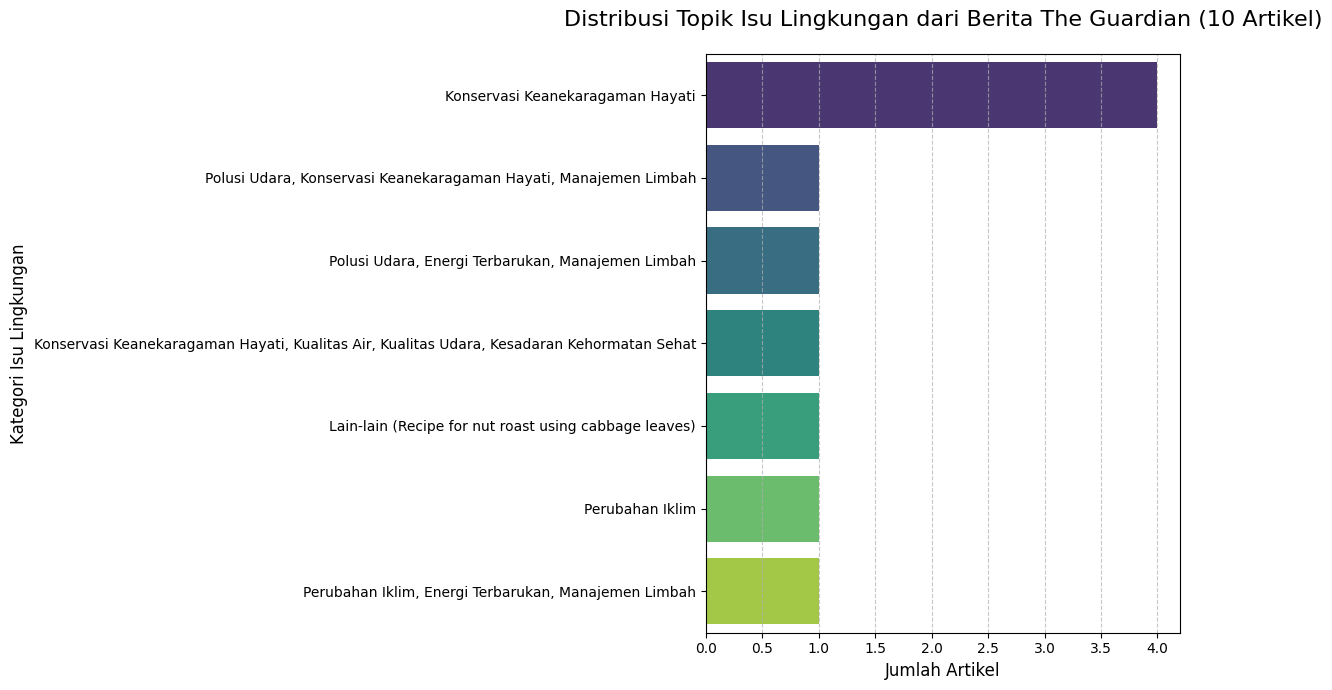

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'articles' in locals() and not articles.empty:
    articles['Classification'] = articles['Classification'].astype(str).str.strip()

    valid_classifications = articles[
        ~articles['Classification'].isin([
            'N/A (Teks artikel kosong/tidak valid)',
            'ERROR: ',
            'Error summarization:',
            'Error classification:',
        ])
    ]['Classification']

    if not valid_classifications.empty:
        plt.figure(figsize=(12, 7))
        sns.countplot(y=valid_classifications, order=valid_classifications.value_counts().index, palette='viridis')
        plt.title('Distribusi Topik Isu Lingkungan dari Berita The Guardian (10 Artikel)', fontsize=16, pad=20)
        plt.xlabel('Jumlah Artikel', fontsize=12)
        plt.ylabel('Kategori Isu Lingkungan', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Tidak ada klasifikasi valid untuk divisualisasikan setelah pemfilteran. Pastikan proses klasifikasi berhasil dan outputnya bersih.")
else:
    print("DataFrame 'articles' tidak ditemukan atau kosong. Pastikan data telah dimuat dan diproses.")

### **Penjelasan Insight**
Dari grafik di atas, kita bisa langsung melihat isu lingkungan mana yang paling sering muncul di 10 artikel The Guardian yang kita proses. Misalnya, jika "Perubahan Iklim" muncul paling sering, ini menunjukkan bahwa isu tersebut sangat dominan dalam pemberitaan media saat ini.

Meskipun hanya dari 10 artikel, *insight* ini sudah sangat berharga untuk:
* **Identifikasi Fokus:** Cepat mengetahui topik apa yang sedang menjadi sorotan utama.
* **Arah Analisis Lanjut:** Memberikan petunjuk awal tentang area mana yang mungkin perlu diselami lebih dalam jika seluruh dataset diproses.

Model AI dengan cerdas berhasil mengategorikan artikel ini, memberikan kita pandangan yang cepat dan terstruktur tentang lanskap isu lingkungan dari sudut pandang berita.